In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)


In [4]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet152V2,preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob

In [6]:
#configuring Gpu memory growth
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [7]:
IMAGE_SIZE = [224,224]
train_path = "C:/Users/RAM BABU/Downloads/train/train"
valid_path = "C:/Users/RAM BABU/Downloads/test/test"

In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
inception = InceptionV3(
    include_top = False,
    weights = "imagenet",
    input_shape = IMAGE_SIZE + [3])

In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [11]:
# Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range= 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = "categorical")

Found 1952 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory(valid_path,
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = "categorical")

Found 18 images belonging to 4 classes.


In [14]:
prediction = Dense(len(training_set.class_indices), activation = "softmax")(x)

# create a model object# our layers - you can add more if you want

model = Model(inputs = inception.input, outputs = prediction)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [16]:
# compile the model with Adam optimizer
optimizer = Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics = ["accuracy"])


In [17]:
# Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range= 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [18]:
# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (224,224),
                                                batch_size =32,
                                                class_mode = "categorical")

Found 1952 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory(valid_path,
                                           target_size = (224,224),
                                           batch_size =32,
                                           class_mode = "categorical")

Found 18 images belonging to 4 classes.


In [20]:
# Calculate steps_per_epoch and validation_steps based on the length of the generator and batch size
steps_per_epoch = len(training_set.classes) // training_set.batch_size
validation_steps = len(test_set.classes) // test_set.batch_size

In [21]:
# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(1, steps_per_epoch)
validation_steps = max(1, validation_steps)

In [ ]:
# train the model
# Run the cell. It will take some time to execute

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
13/61 [=====>........................] - ETA: 2:30 - loss: 0.3694 - accuracy: 0.9519

In [23]:
import matplotlib.pyplot as plt

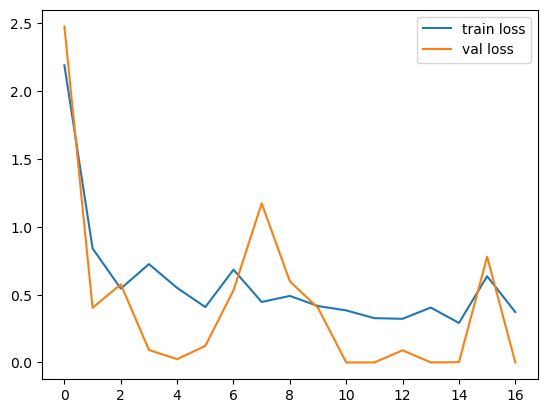

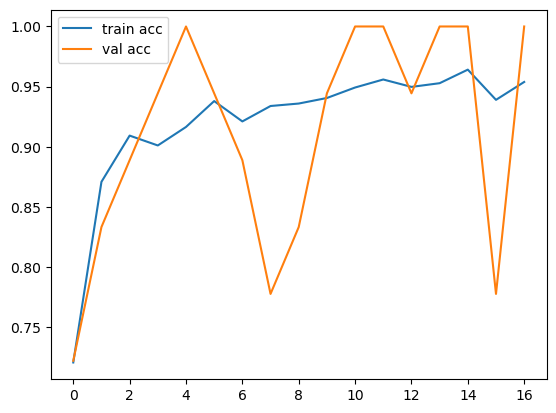

<Figure size 640x480 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
from tensorflow.keras.models import load_model
model.save("C:/Users/RAM BABU/Downloads/model_inception.h5")


C:\Users\RAM BABU\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
y_pred = model.predict(test_set)

1/1 [==============================] - 5s 5s/step


In [27]:
y_pred

array([[6.5346910e-22, 7.8389465e-12, 1.0000000e+00, 8.7241320e-13],
       [8.5867537e-12, 1.4159045e-03, 9.9858415e-01, 1.5035809e-17],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 9.7182627e-28],
       [2.3532098e-25, 0.0000000e+00, 1.0000000e+00, 9.5350798e-31],
       [1.0389917e-36, 3.5647722e-13, 0.0000000e+00, 1.0000000e+00],
       [8.8797613e-08, 2.4025328e-12, 9.9999988e-01, 3.2817677e-09],
       [9.9524658e-04, 6.1593306e-19, 9.9900478e-01, 2.3052833e-14],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [9.9999237e-01, 7.6775050e-06, 6.7599972e-22, 1.3006177e-13],
       [1.7019259e-21, 9.9998331e-01, 3.9043035e-20, 1.6747388e-05],
       [2.1943080e-28, 1.0000000e+00, 4.1462040e-27, 1.5854029e-22],
       [1.0000000e+00, 9.4660522e-21, 6.8608120e-25, 1.3151157e-32],
       [8.5474124e-25, 2.7717139e-16, 1.8685676e-29, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.2008360e-22, 5.5005743e-16],
       [1.2663909e-09, 2.5770946e-

In [28]:
import numpy as np
y_pred = np.argmax(y_pred,axis = 1)

In [29]:
y_pred

array([2, 2, 1, 2, 3, 2, 2, 1, 0, 1, 1, 0, 3, 0, 3, 3, 3, 1], dtype=int64)

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
img=image.load_img('C:/Users/RAM BABU/Downloads/coffee.jpg',target_size=(224,224))

In [32]:
x = image.img_to_array(img)
x

array([[[138.,  96.,  74.],
        [140.,  98.,  76.],
        [158., 115.,  96.],
        ...,
        [ 23.,  28.,  24.],
        [ 25.,  30.,  26.],
        [ 18.,  23.,  19.]],

       [[130.,  85.,  64.],
        [142.,  97.,  76.],
        [149., 107.,  83.],
        ...,
        [ 28.,  32.,  31.],
        [ 30.,  35.,  31.],
        [ 30.,  35.,  31.]],

       [[112.,  70.,  46.],
        [126.,  84.,  62.],
        [148., 103.,  82.],
        ...,
        [ 27.,  31.,  30.],
        [ 30.,  35.,  31.],
        [ 30.,  34.,  33.]],

       ...,

       [[  8.,  10.,   9.],
        [  7.,   9.,   8.],
        [  4.,   6.,   5.],
        ...,
        [  5.,   5.,   5.],
        [  2.,   2.,   0.],
        [  3.,   3.,   1.]],

       [[  5.,   7.,   6.],
        [  6.,   8.,   7.],
        [  7.,   9.,   8.],
        ...,
        [  4.,   4.,   2.],
        [  5.,   5.,   5.],
        [  3.,   3.,   1.]],

       [[  3.,   5.,   4.],
        [  5.,   7.,   6.],
        [  6.,  

In [33]:
x.shape

(224, 224, 3)

In [34]:
x = x/255

In [35]:
import numpy as np
x = np.expand_dims(x,axis =0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[2.3620326e-02, 1.0846641e-05, 2.6129162e-06, 9.7636628e-01]],
      dtype=float32)

In [37]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 92ms/step


In [38]:
a!=1 

array([ True])

In [39]:
import tensorflow as tf

In [40]:
tf.__version__

'2.14.0'